In [1]:
!curl http://127.0.0.1:3000

{
    "task": "Analyze images. Input is an image file and output is json-like with raw data. Usage: curl -i -F \"image=@<full_image_path>\" yenthenas.ddns.net:5000"
}


In [2]:
import requests
import os

# def get_key_element(path_img):
#     url = 'http://127.0.0.1:5000/'
#     with open(path_img, 'rb') as img:
#         name_img= os.path.basename(path_img)
#         files= {'image': (name_img,img,'multipart/form-data',{'Expires': '0'}) }
#         with requests.Session() as s:
#             r = s.post(url,files=files)
#             print(r.status_code)
#     return r.json()

def get_key_element(path_img):
    url = 'http://127.0.0.1:3000/'
    files= {'image': path_img }
    with requests.Session() as s:
        r = s.post(url,data=files)
        print(r.status_code)
    return r.json()

In [3]:
def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
	return iou

In [4]:
def reduce_overlap(results, overlap_thresh=0.9):
    keys = list(results.keys())
    n = len(keys)
    keeps = []
    discards = []
    for a in range(n - 1):
        if keys[a] not in discards:
            keeps.append(keys[a])
            for b in range(a + 1, n):
                iou = bb_intersection_over_union(
                    list(results[keys[a]]['loc'].values()), 
                    list(results[keys[b]]['loc'].values())
                )
                if iou > overlap_thresh and keys[b] not in discards:
                    discards.append(keys[b])
                # break
        # break
    return keeps

In [6]:
import os
from PIL import Image, ImageDraw, ImageFont

path = '/home/yuuhanase/workspace/hackhcmc/hackhcmc_dataset'
files = os.listdir(path)
font = ImageFont.truetype("LiberationSans-Regular.ttf", 100)

for file in files:
    img_path = os.path.join(
        path,
        file
    )
    image = Image.open(img_path)
    key_element = get_key_element(img_path)
    
    ### PRODUCT RESULT
    key = 'product'
    results = key_element[key]
    im = image.copy()
    draw = ImageDraw.Draw(im)
    keeps = reduce_overlap(results)
    # print(keeps)
    for obj in keeps:
        loc = list(results[obj]['loc'].values())
        brand = results[obj]['brand']
        label = results[obj]['label']
        
        draw.rectangle(loc, width=5, outline=(255, 0, 0))
        draw.text(
            loc[:2], 
            f"{label}\n{brand}", 
            font=font, 
            fill=(1, 1, 1), 
            stroke_fill=(255, 255, 255),
            stroke_width=5
        )
    os.makedirs(f"eval_results/{key}", exist_ok=True)
    im.save(f"eval_results/{key}/image.jpg")

    ### HUMAN RESULT
    key = 'human'
    results = key_element[key]
    im = image.copy()
    draw = ImageDraw.Draw(im)
    # keeps = reduce_overlap(results)
    # print(keeps)
    for obj in results.keys():
        loc = list(results[obj]['loc'].values())
        gender = results[obj]['gender']
        emotion = results[obj]['emotion']
        action = results[obj]['action']
        role = results[obj]['role']
        
        draw.rectangle(loc, width=15, outline=(255, 0, 0))
        draw.text(
            loc[:2], 
            f"{gender}-{emotion}\n{action}-{role}", 
            font=font, 
            fill=(1, 1, 1), 
            stroke_fill=(255, 255, 255),
            stroke_width=5
        )
    os.makedirs(f"eval_results/{key}", exist_ok=True)
    im.save(f"eval_results/{key}/image.jpg")

    ### POSM RESULT
    key = 'posm'
    results = key_element[key]
    im = image.copy()
    draw = ImageDraw.Draw(im)
    keeps = reduce_overlap(results)
    print(results, keeps)
    for obj in keeps:
        loc = list(results[obj]['loc'].values())
        brand = results[obj]['brand']
        label = results[obj]['label']
        
        draw.rectangle(loc, width=15, outline=(255, 0, 0))
        draw.text(
            loc[:2], 
            f"{label}\n{brand}", 
            font=font, 
            fill=(1, 1, 1), 
            stroke_fill=(255, 255, 255),
            stroke_width=5
        )
    os.makedirs(f"eval_results/{key}", exist_ok=True)
    im.save(f"eval_results/{key}/image.jpg")
    break

# key_element

200
{} []


['0', '1', '2', '3', '4', '5', '6', '10', '13', '17']


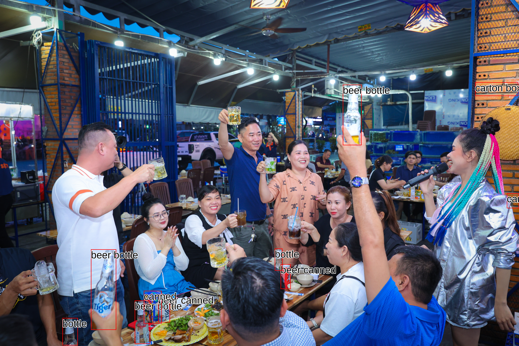

In [19]:
from PIL import ImageDraw, ImageFont
font = ImageFont.truetype("LiberationSans-Regular.ttf", 100)

key = 'product'
results = key_element[key]
im = image.copy()
draw = ImageDraw.Draw(im)
keeps = reduce_overlap(results)
print(keeps)
for obj in keeps:
    loc = list(results[obj]['loc'].values())
    brand = results[obj]['brand']
    label = results[obj]['label']
    
    draw.rectangle(loc, width=5, outline=(255, 0, 0))
    draw.text(
        loc[:2], 
        f"{label}\n{brand}", 
        font=font, 
        fill=(1, 1, 1), 
        stroke_fill=(255, 255, 255),
        stroke_width=5
    )
    # print(label)
    # break

resize_ratio = .1

im.resize((int(im.size[0]*resize_ratio),int(im.size[1]*resize_ratio)))

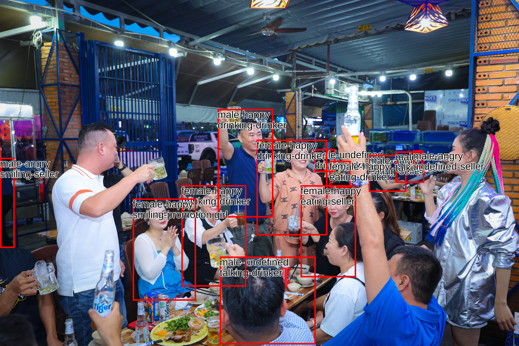

In [24]:
key = 'human'
results = key_element[key]
im = image.copy()
draw = ImageDraw.Draw(im)
# keeps = reduce_overlap(results)
# print(keeps)
for obj in results.keys():
    loc = list(results[obj]['loc'].values())
    gender = results[obj]['gender']
    emotion = results[obj]['emotion']
    action = results[obj]['action']
    role = results[obj]['role']
    
    draw.rectangle(loc, width=15, outline=(255, 0, 0))
    draw.text(
        loc[:2], 
        f"{gender}-{emotion}\n{action}-{role}", 
        font=font, 
        fill=(1, 1, 1), 
        stroke_fill=(255, 255, 255),
        stroke_width=5
    )
    # print(label)
    # break

resize_ratio = .1

im.resize((int(im.size[0]*resize_ratio),int(im.size[1]*resize_ratio)))

{} []


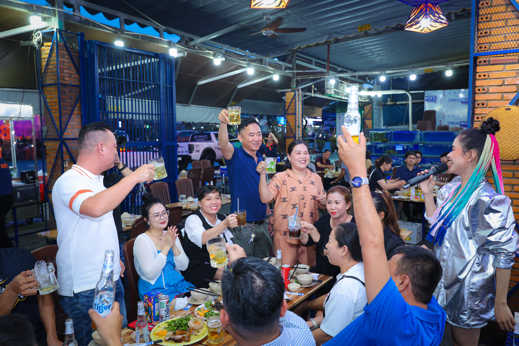

In [27]:
key = 'posm'
results = key_element[key]
im = image.copy()
draw = ImageDraw.Draw(im)
keeps = reduce_overlap(results)
print(results, keeps)
for obj in keeps:
    loc = list(results[obj]['loc'].values())
    brand = results[obj]['brand']
    label = results[obj]['label']
    
    draw.rectangle(loc, width=15, outline=(255, 0, 0))
    draw.text(
        loc[:2], 
        f"{label}\n{brand}", 
        font=font, 
        fill=(1, 1, 1), 
        stroke_fill=(255, 255, 255),
        stroke_width=5
    )
    # print(label)
    # break

resize_ratio = .1

im.resize((int(im.size[0]*resize_ratio),int(im.size[1]*resize_ratio)))

In [28]:
key = 'context'
results = key_element[key]
print(results)

{'context': 'pub', 'action': 'celebration', 'environment': 'outdoor'}
